# Project: Investigate a Dataset (The Movie Database (TMDb))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

    In this project, I will investigate the (The Movie Database (TMDb)). This dataset contains different pieces of information on films like the main actor, director, budget, ....etc.

    After a quick view of the dataset on Microsoft Excel, I made some questions that their answers would interest the viewer.

    Here are some of these questions:
    
        1- which film has the largest budget and which one has the lowest?
        2- which film has the largest revenue and which one has the lowest?
        3- which film has the highest rating?
        4- which year has the largest number of produced films and which one has the lowest?
        5- Which year has the highest total budget for all the produced films and which one has the lowest?
        6- Which year has the highest total revenue for all the produced films and which one has the lowest?
        7- For the year 2015, What is the relation between the budget and revenue? Is more budget means more revenue? 
        8- For the year 2015, what is the relation between the rating and popularity? Is a higher rate means a higher popularity?
       
   
    
##### let the fun begin.

In [62]:
# Imported liberaries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import time
# Stop floats from displaying as scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

IndentationError: unexpected indent (<ipython-input-62-f62bde13c2aa>, line 3)

In [118]:
# Define function to draw multi y-axis with only one x-axis
def plot_multi(data, cols=None, spacing=.1, **kwargs):
    from pandas import plotting
   
    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_matplotlib').style, '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

<a id='wrangling'></a>
## Data Wrangling


### Step 1: Gathering Data

In [64]:
#Open the given CSV file
tmdb_database_original = pd.read_csv("tmdb-movies-original.csv")

### Step 2: Data Assesing

In [65]:
#Visual_Assess
## 1)inspect it using Excel
## 2) inspect using code

list(tmdb_database_original)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [66]:
tmdb_database_original.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


In [67]:
tmdb_database_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [68]:
tmdb_database_original.shape

(10866, 21)

In [69]:
tmdb_database_original.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [70]:
tmdb_database_original['id'].duplicated().value_counts()

False    10865
True         1
Name: id, dtype: int64

In [71]:
tmdb_database_original[tmdb_database_original['id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


#### Assessing Results

a) Quality Assessment

    * 1)Some columns have inappropriate column names like (budget_adj, revenue_adj).
    * 2)One row is duplicated.
    * 3)Release_date column has type of object.
            
b) Tidiness Assessment
    
   * 1)For fair comparison  I will use the columns (budget_adj, revenue_adj) instead of (budget, revenue) as the two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. drop the columns (budget, revenue)
   * 2)In my investigation some columns is not needed like (budget, revenue, tagline, keywords, overview, cast, homepage, imdb_id)

### Step 3: Data Cleaning

In [72]:
# creat a copy the dataframe to modify and clean
tmdb_database_new = tmdb_database_original.copy()

In [73]:
#Drop the not needed columns in our analysis
droped_columns = ['budget', 'revenue', 'tagline', 'keywords', 'overview', 'cast', 'homepage', 'imdb_id', 'director']
tmdb_database_new.drop(droped_columns, inplace=True, axis=1)

In [74]:
#Test 1
list(tmdb_database_new)

['id',
 'popularity',
 'original_title',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [75]:
#Test 2
tmdb_database_new.shape

(10866, 12)

In [76]:
# change release_date column type from object to datetime formate
tmdb_database_new['release_date'] = pd.to_datetime(tmdb_database_new['release_date'])

In [77]:
#Test
tmdb_database_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   original_title        10866 non-null  object        
 3   runtime               10866 non-null  int64         
 4   genres                10843 non-null  object        
 5   production_companies  9836 non-null   object        
 6   release_date          10866 non-null  datetime64[ns]
 7   vote_count            10866 non-null  int64         
 8   vote_average          10866 non-null  float64       
 9   release_year          10866 non-null  int64         
 10  budget_adj            10866 non-null  float64       
 11  revenue_adj           10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 891.4+

In [78]:
# Remove duplicated row
tmdb_database_new.drop(index=2090, inplace=True)

In [79]:
# Test
tmdb_database_new['id'].duplicated().value_counts()

False    10865
Name: id, dtype: int64

In [80]:
# give column appropriate names
tmdb_database_new.rename(columns = {'budget_adj':'budget_terms_2010_dolars', 'revenue_adj':'revenue_terms_2010_dolars'} , inplace=True)

In [81]:
# Test
list(tmdb_database_new)

['id',
 'popularity',
 'original_title',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_terms_2010_dolars',
 'revenue_terms_2010_dolars']

In [82]:
# finding 0 values rows in budget_terms_2010_dolars columns
(tmdb_database_new['budget_terms_2010_dolars']== 0).value_counts()

True     5696
False    5169
Name: budget_terms_2010_dolars, dtype: int64

In [83]:
# Replace 0  value in budget_terms_2010_dolars columns with NAN
tmdb_database_new['budget_terms_2010_dolars'].replace(0, np.nan, inplace=True)

In [84]:
# Test
(tmdb_database_new['budget_terms_2010_dolars']== 0).value_counts()

False    10865
Name: budget_terms_2010_dolars, dtype: int64

In [85]:
# Drop NAN valuen in budget_terms_2010_dolars columns
tmdb_database_new.drop(index=tmdb_database_new[tmdb_database_new["budget_terms_2010_dolars"].isnull()].index, inplace=True)

In [86]:
# Test
tmdb_database_new['budget_terms_2010_dolars'].isnull().value_counts()

False    5169
Name: budget_terms_2010_dolars, dtype: int64

In [87]:
# finding 0 values rows in revenue_terms_2010_dolars columns
(tmdb_database_new['revenue_terms_2010_dolars']== 0).value_counts()

False    3854
True     1315
Name: revenue_terms_2010_dolars, dtype: int64

In [88]:
# Replace 0  value in revenue_terms_2010_dolars columns with NAN
tmdb_database_new['revenue_terms_2010_dolars'].replace(0, np.nan, inplace=True)

In [89]:
# Test
(tmdb_database_new['revenue_terms_2010_dolars']== 0).value_counts()

False    5169
Name: revenue_terms_2010_dolars, dtype: int64

In [90]:
# Drop NAN valuen in revenue_terms_2010_dolars columns
tmdb_database_new.drop(index=tmdb_database_new[tmdb_database_new["revenue_terms_2010_dolars"].isnull()].index, inplace=True)

In [91]:
# Test
tmdb_database_new['revenue_terms_2010_dolars'].isnull().value_counts()

False    3854
Name: revenue_terms_2010_dolars, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Q1 which film has the largest budget and which one has the lowest?


In [92]:
# Largest budget film
tmdb_database_new.loc[tmdb_database_new['budget_terms_2010_dolars'].idxmax()]

id                                                               46528
popularity                                                        0.25
original_title                                       The Warrior's Way
runtime                                                            100
genres                       Adventure|Fantasy|Action|Western|Thriller
production_companies                          Boram Entertainment Inc.
release_date                                       2010-12-02 00:00:00
vote_count                                                          74
vote_average                                                      6.40
release_year                                                      2010
budget_terms_2010_dolars                                425,000,000.00
revenue_terms_2010_dolars                                11,087,569.00
Name: 2244, dtype: object

In [93]:
# Lowest budget film
tmdb_database_new.loc[tmdb_database_new['budget_terms_2010_dolars'].idxmin()]

id                                                                       59296
popularity                                                                0.52
original_title                                         Love, Wedding, Marriage
runtime                                                                     90
genres                                                          Comedy|Romance
production_companies         120dB Films|Scion Films|Voodoo Production Serv...
release_date                                               2011-06-03 00:00:00
vote_count                                                                  55
vote_average                                                              5.30
release_year                                                              2011
budget_terms_2010_dolars                                                  0.97
revenue_terms_2010_dolars                                             1,335.83
Name: 3581, dtype: object

From the previous commands we found that :
1) Film (The Warrior's Way) released in 2010-12-02 has the highest budget in our dataframe with 425,000,000 Dollars

2) Film (Love, Wedding, Marriage) released in 2011-06-03 has the lowest budget in our dataframe with 0.97 Dollars


### Q2 which film has the largest revenue and which one has the lowest?

In [94]:
# Largest budget film
tmdb_database_new.loc[tmdb_database_new['revenue_terms_2010_dolars'].idxmax()]

id                                                                       19995
popularity                                                                9.43
original_title                                                          Avatar
runtime                                                                    162
genres                                Action|Adventure|Fantasy|Science Fiction
production_companies         Ingenious Film Partners|Twentieth Century Fox ...
release_date                                               2009-12-10 00:00:00
vote_count                                                                8458
vote_average                                                              7.10
release_year                                                              2009
budget_terms_2010_dolars                                        240,886,902.89
revenue_terms_2010_dolars                                     2,827,123,750.41
Name: 1386, dtype: object

In [95]:
# Lowest budget film
tmdb_database_new.loc[tmdb_database_new['revenue_terms_2010_dolars'].idxmin()]

id                                                                       13537
popularity                                                                0.46
original_title                                                 Shattered Glass
runtime                                                                     94
genres                                                           Drama|History
production_companies         Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date                                               2003-11-14 00:00:00
vote_count                                                                  46
vote_average                                                              6.40
release_year                                                              2003
budget_terms_2010_dolars                                          7,112,115.87
revenue_terms_2010_dolars                                                 2.37
Name: 5067, dtype: object

From the previous commands we found that :

1) Film (Avatar) released in 2009-12-10 has the highest revenue in our dataframe with 2,827,123,750.41 Dollars

2) Film (Shattered Glass) released in 2003-11-14 has the lowest revenue in our dataframe with 02.37 Dollars

### Q3 which film has the highest rating and which one has the lowest?

In [96]:
# Highest rate film
tmdb_database_new.loc[tmdb_database_new['vote_average'].idxmax()]

id                                                 278
popularity                                        7.19
original_title                The Shawshank Redemption
runtime                                            142
genres                                     Drama|Crime
production_companies         Castle Rock Entertainment
release_date                       1994-09-10 00:00:00
vote_count                                        5754
vote_average                                      8.40
release_year                                      1994
budget_terms_2010_dolars                 36,777,789.04
revenue_terms_2010_dolars                41,693,462.72
Name: 4178, dtype: object

In [97]:
# Highest rate film
tmdb_database_new.loc[tmdb_database_new['vote_average'].idxmin()]

id                                                                      116977
popularity                                                                0.11
original_title                                                      Foodfight!
runtime                                                                     87
genres                                          Animation|Action|Comedy|Family
production_companies         Threshold Entertainment|Lions Gate Family Ente...
release_date                                               2012-06-15 00:00:00
vote_count                                                                  12
vote_average                                                              2.20
release_year                                                              2012
budget_terms_2010_dolars                                         61,733,378.29
revenue_terms_2010_dolars                                            70,001.85
Name: 4859, dtype: object

From the previous commands we found that :

1) Film (The Shawshank Redemption) released in 1994-09-10 has the highest rate in our dataframe with average vote rate 8.4

2) Film (Foodfight!) released in 2012-06-15 has the lowest rate in our dataframe with average vote rate 2.2

### Q4 which year has the largest number of produced films and which one has the lowest?

Text(0, 0.5, 'No. of films ')

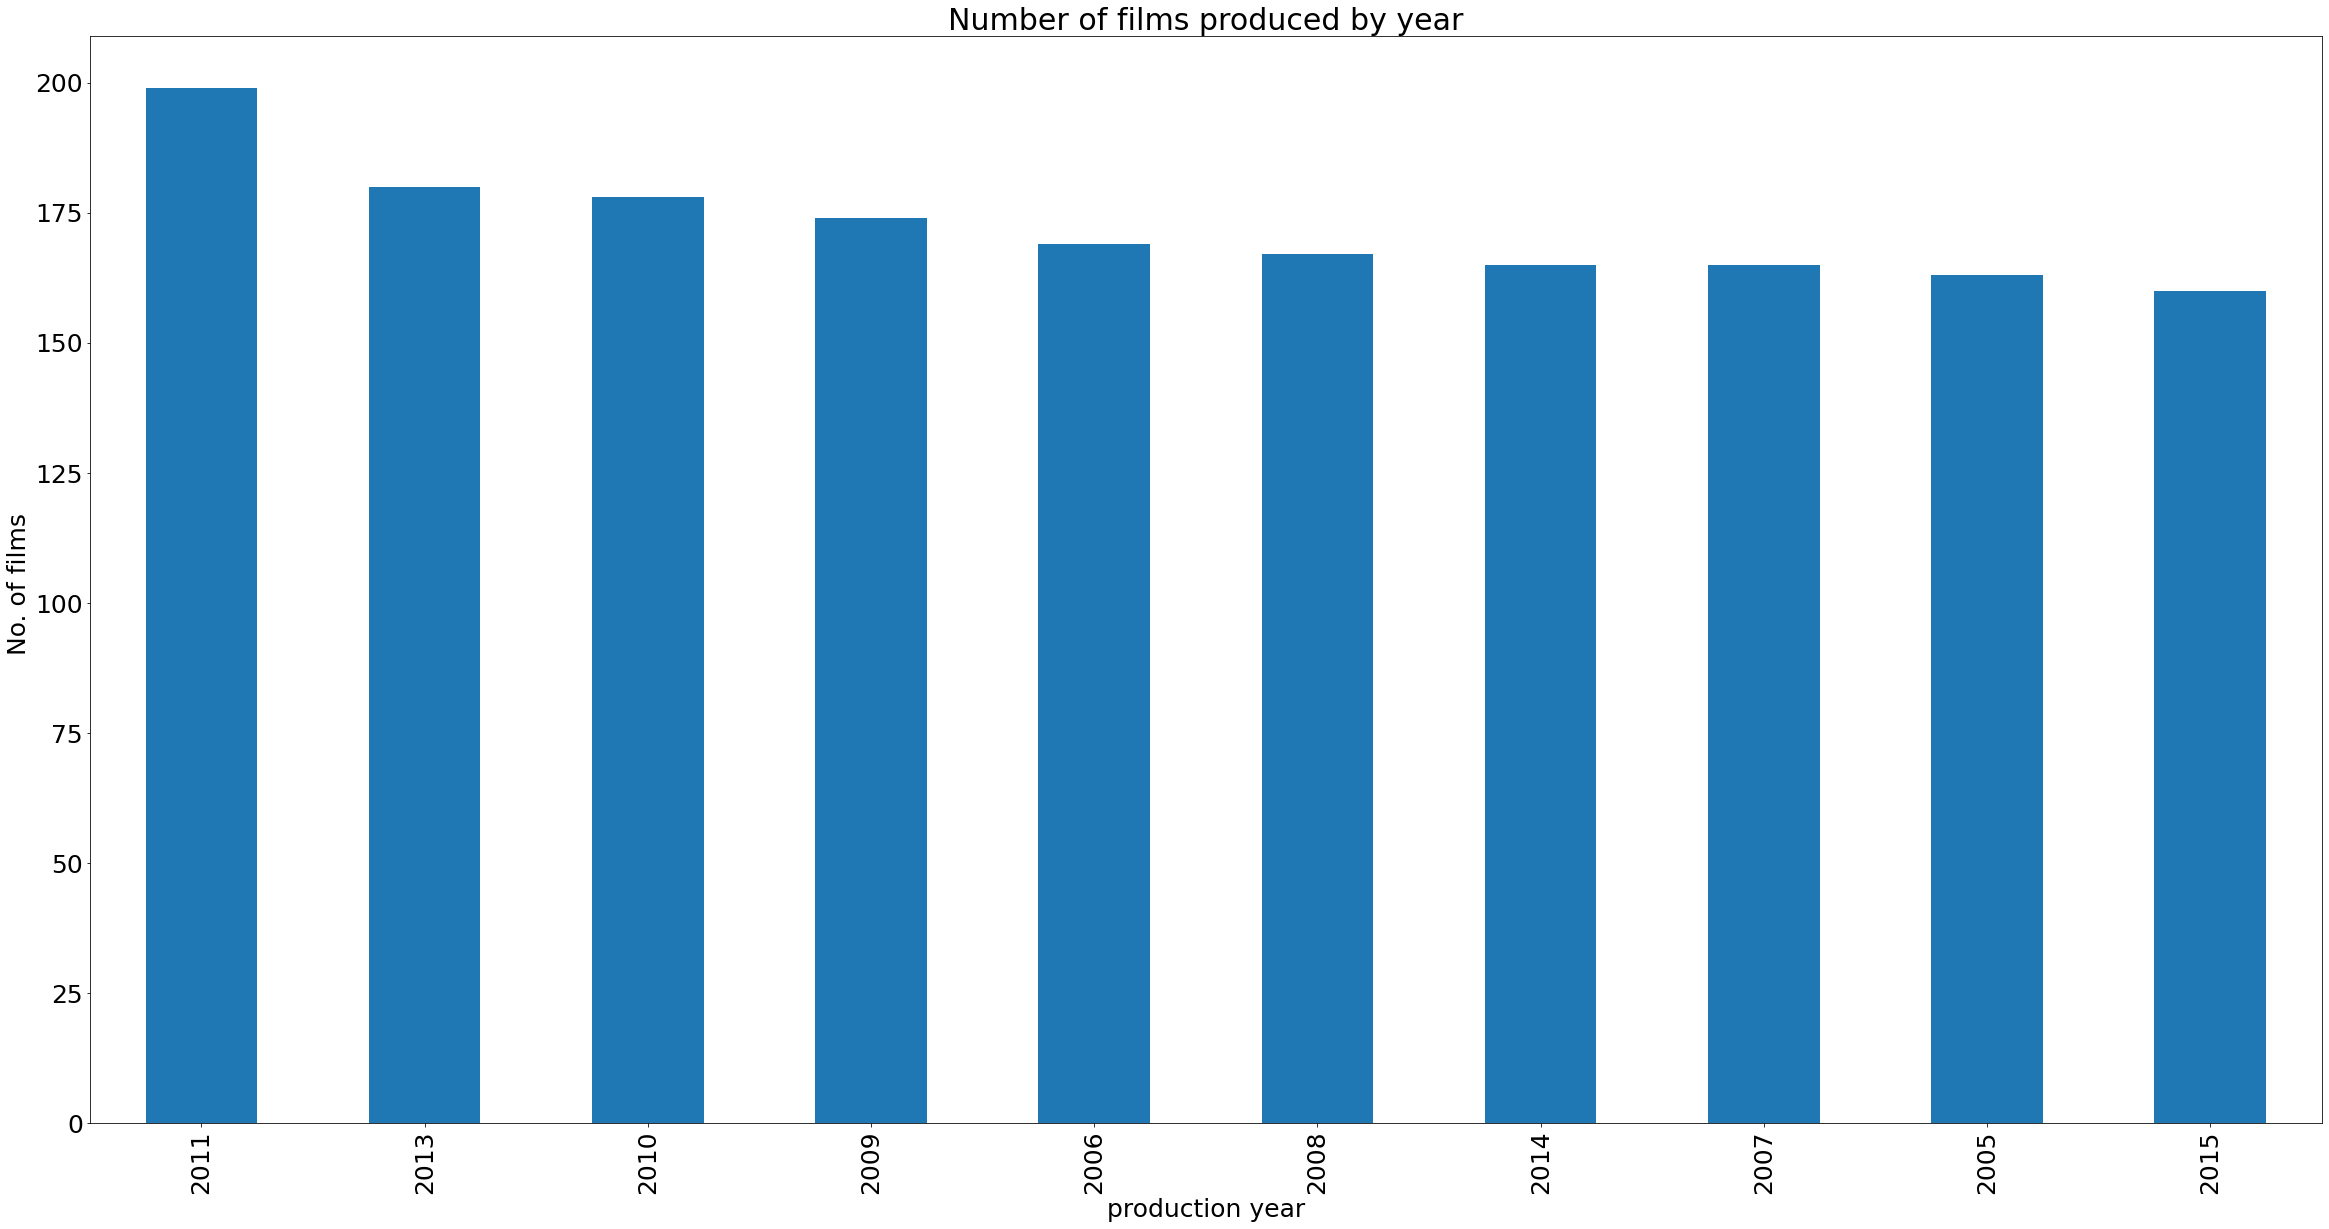

In [98]:
tmdb_database_new['release_year'].value_counts()[:10].plot(kind="bar",figsize=(40,20))
plt.title("Number of films produced by year")
plt.xlabel("production year")
plt.ylabel("No. of films ")

Text(0, 0.5, 'No. of films ')

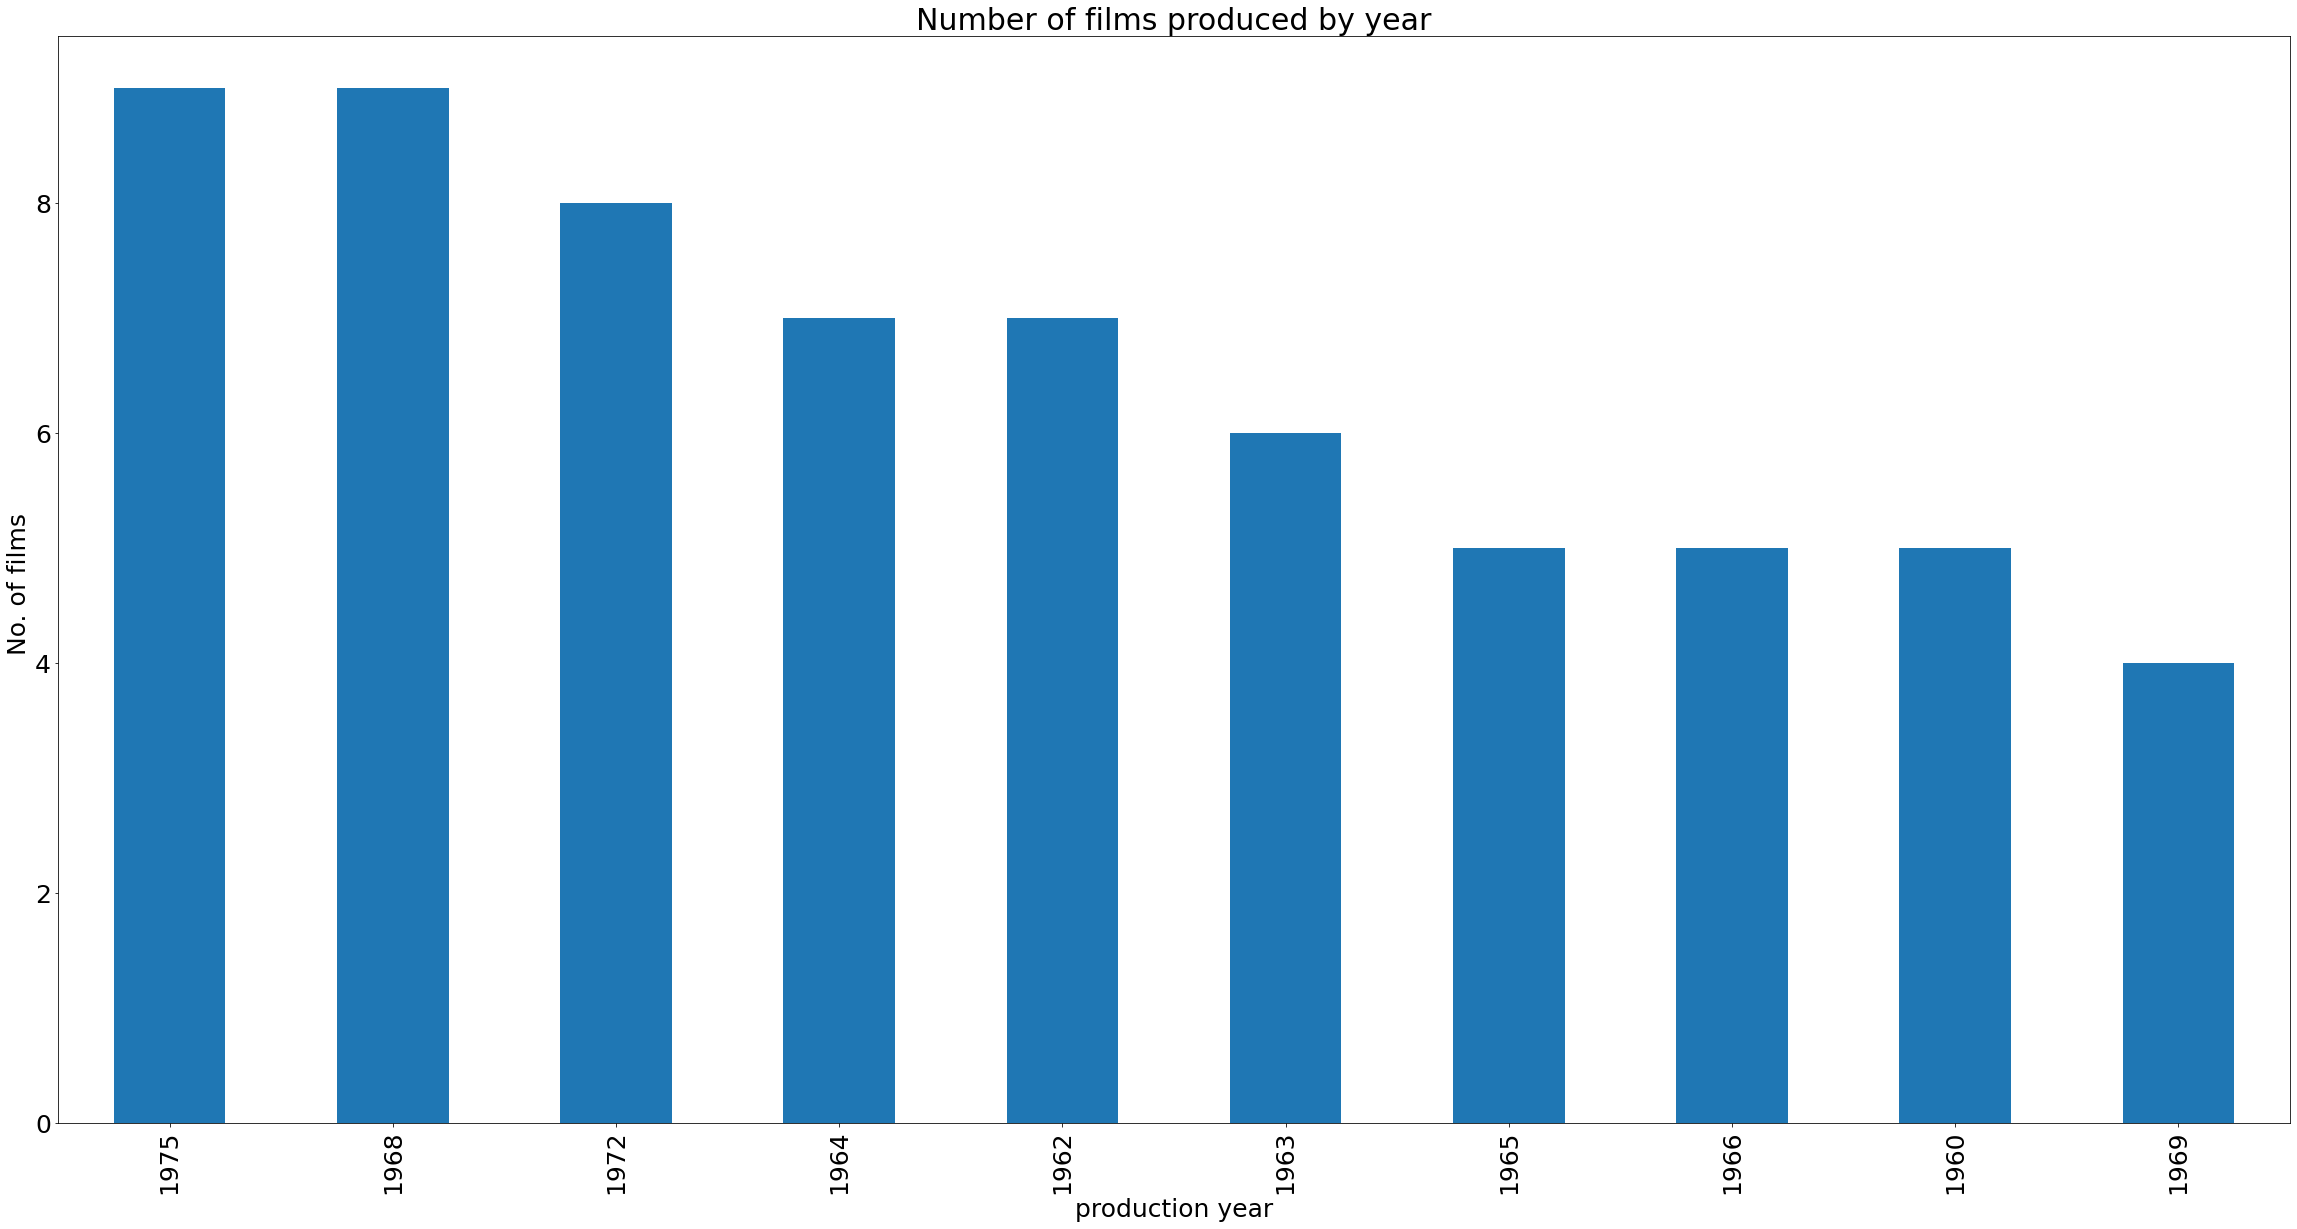

In [99]:
tmdb_database_new['release_year'].value_counts()[-10:].plot(kind="bar",figsize=(40,20))
plt.title("Number of films produced by year")
plt.xlabel("production year")
plt.ylabel("No. of films ")

In [100]:
# Group the values by release year and then count the values in each group
no_film_per_year_db = tmdb_database_new[['id','release_year']].groupby("release_year").agg('count')
no_film_per_year_db.loc[no_film_per_year_db['id'].idxmax()]

id    199
Name: 2011, dtype: int64

In [101]:
no_film_per_year_db.loc[no_film_per_year_db['id'].idxmin()]

id    4
Name: 1969, dtype: int64

From the previous commands we found that :

1) Year 2011 has the largest number of released films with 199 films.

2) Year 1969 has the lowest number of released films with 4 films.

### Q5 Which year has the highest total budget for all the produced films and which one has the lowest?

In [102]:
# Group the values by year and then sum the values of budget in each group and then find the maximum and minimum values
sum_budget_per_year_db = tmdb_database_new[['budget_terms_2010_dolars','release_year']].groupby("release_year").agg('sum')

In [103]:
sum_budget_per_year_db.loc[sum_budget_per_year_db['budget_terms_2010_dolars'].idxmax()]

budget_terms_2010_dolars       8,463,138,439.00
Name: 2010, dtype: float64

In [104]:
sum_budget_per_year_db.loc[sum_budget_per_year_db['budget_terms_2010_dolars'].idxmin()]

budget_terms_2010_dolars         123,398,694.38
Name: 1972, dtype: float64

From the previous commands we found that :

1) The year 2010 has the highest total films budget in our dataframe with 8,463,138,439.00 Dollars

2) The year 192 has the lowest total films budget in our dataframe with 123,398,694.38 Dollars

### Q6 Which year has the highest total revenue for all the produced films and which one has the lowest?

In [105]:
# Group the values by year and then sum the values of budget in each group and then find the maximum and minimum values
sum_revenue_per_year_db = tmdb_database_new[['revenue_terms_2010_dolars','release_year']].groupby("release_year").agg('sum')

In [106]:
sum_revenue_per_year_db.loc[sum_revenue_per_year_db['revenue_terms_2010_dolars'].idxmax()]

revenue_terms_2010_dolars      24,106,678,369.98
Name: 2015, dtype: float64

In [107]:
sum_revenue_per_year_db.loc[sum_revenue_per_year_db['revenue_terms_2010_dolars'].idxmin()]

revenue_terms_2010_dolars         569,262,321.68
Name: 1966, dtype: float64

From the previous commands we found that :

1) The year 2015 has the highest total films budget in our dataframe with 24,106,678,369.98 Dollars

2) The year 1966 has the lowest total films budget in our dataframe with 569,262,321.68 Dollars

### Q7 For the year 2015, What is the relation between the budget and revenue? Is more budget means more revenue?

In [108]:
# A subset of the data frame with only films released in 2015
films_2015_db = tmdb_database_new[tmdb_database_new['release_year'] == 2015]

In [109]:
# Test
films_2015_db['release_year'].value_counts()

2015    160
Name: release_year, dtype: int64

In [110]:
# subset of films_2015_db to draw
films_2015_db_sub = films_2015_db[:30]

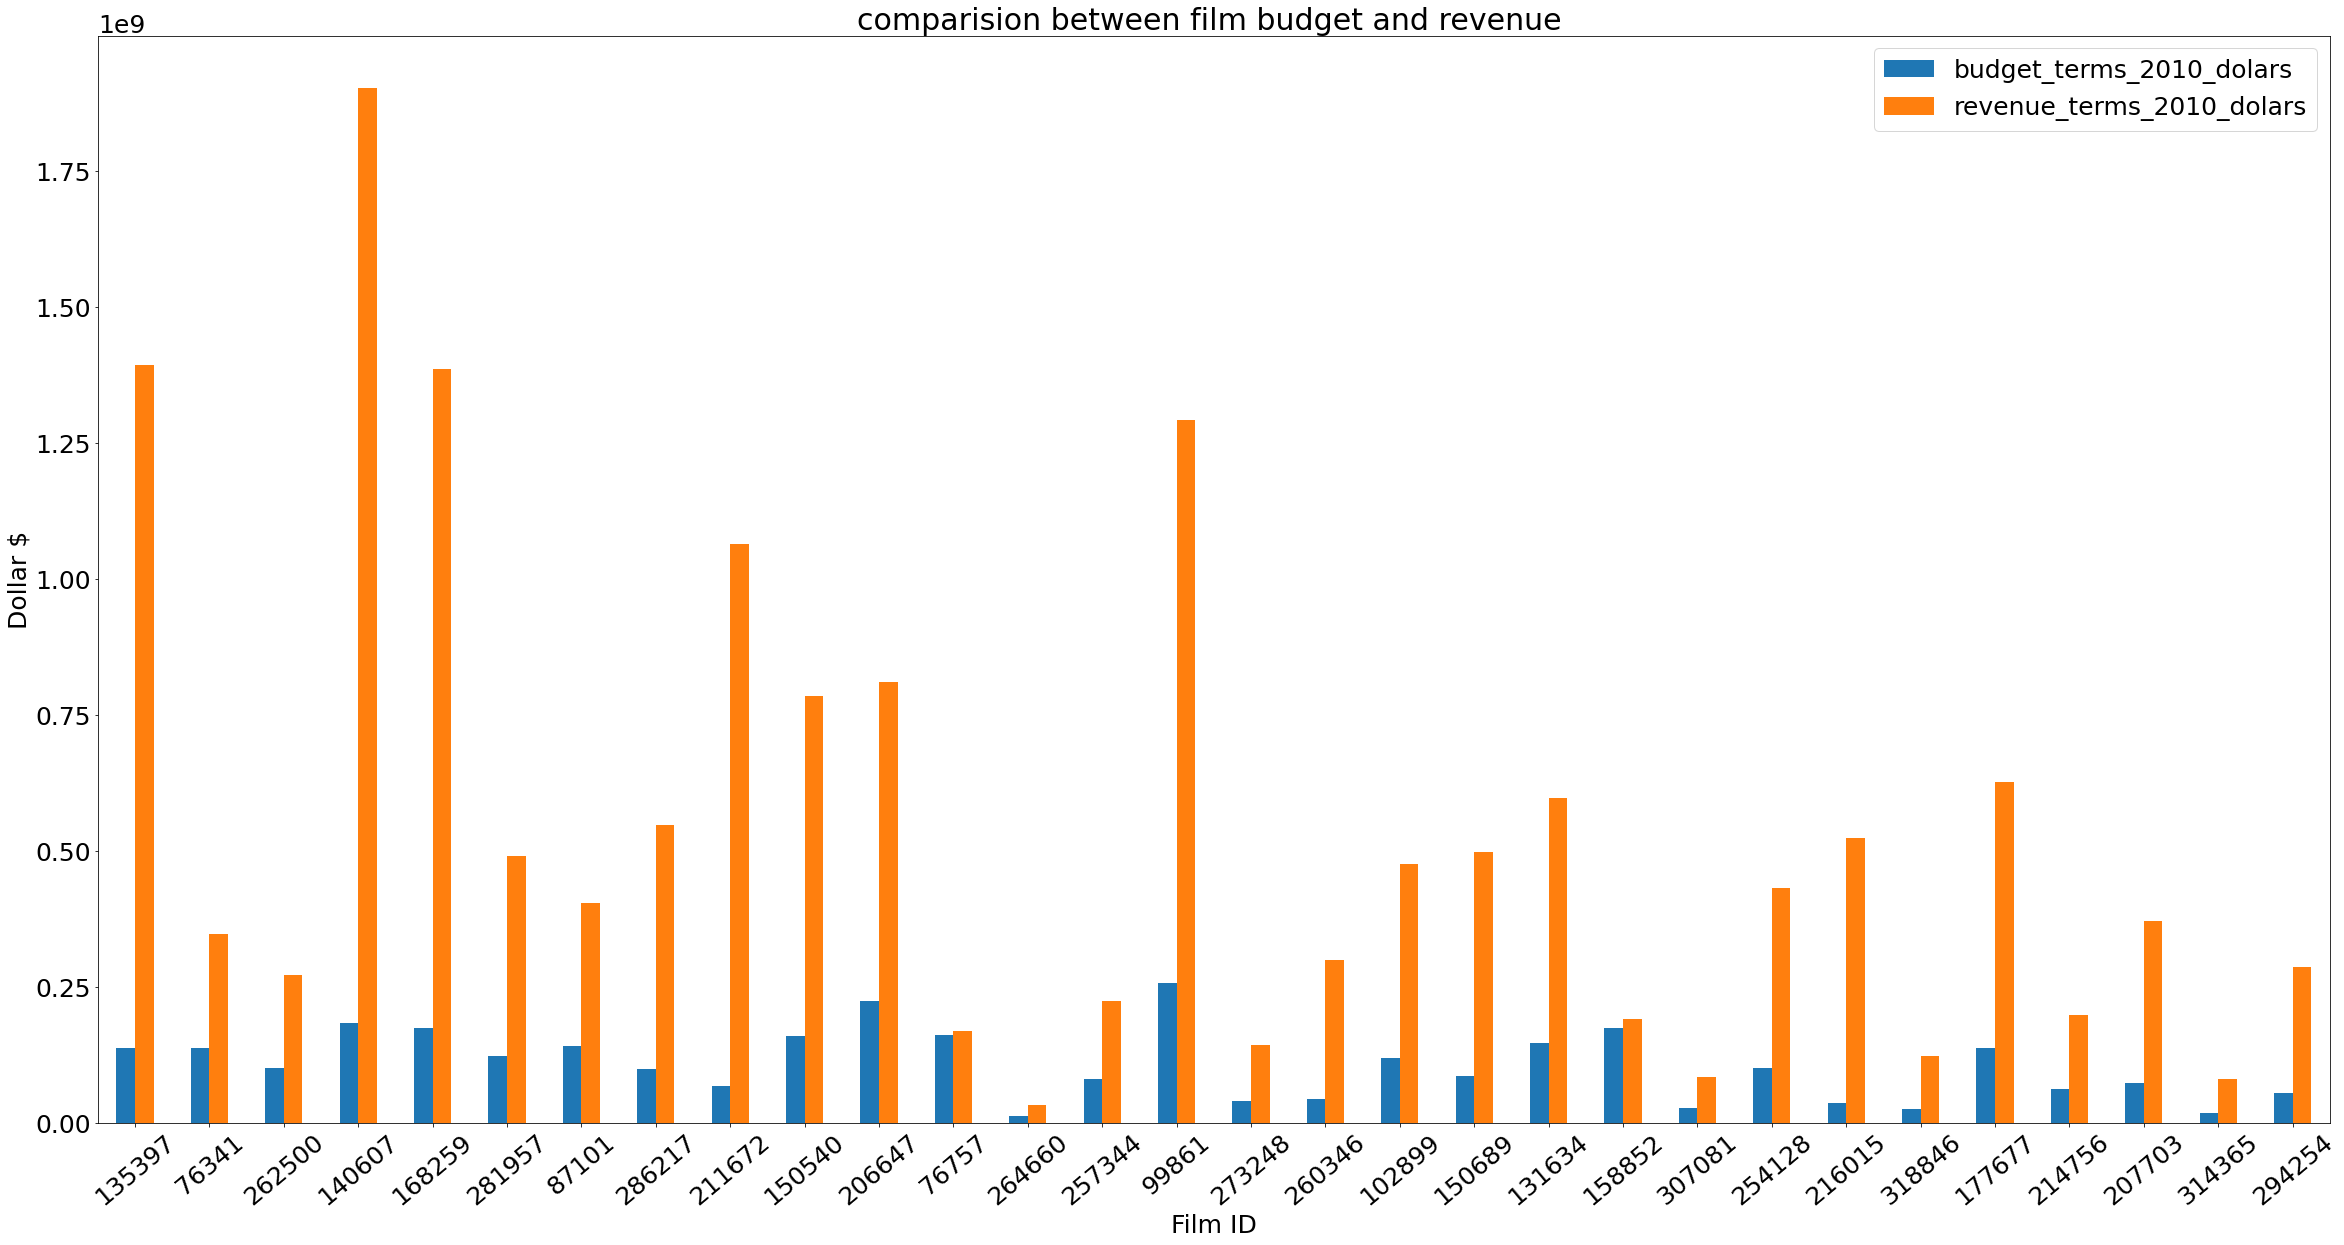

In [111]:
fig1 = plt.figure()# Create matplotlib figure
ax = fig1.add_subplot(111) # Create matplotlib axes
width = 0.4
films_2015_db_sub.plot.bar(x = 'id', y = ['budget_terms_2010_dolars', 'revenue_terms_2010_dolars'], rot = 40, ax = ax, figsize=(40,20))
plt.title("comparision between film budget and revenue ")
ax.set_xlabel('Film ID')
ax.set_ylabel('Dollar $')
plt.rcParams.update({'font.size': 25})
plt.show()

From the previouse figure we found out the the relation between revenue and budget is not linear before reaching final decidion we need to make more investigation.

In [112]:
# Create new column shows the budget percentage to revenue (budget/revenue)%
# column name is (budget_revenue_percent)
tmdb_database_new["budget_revenue_percent"] = tmdb_database_new['budget_terms_2010_dolars'] / tmdb_database_new['revenue_terms_2010_dolars']

In [113]:
films_2015_db_2 = tmdb_database_new[tmdb_database_new['release_year'] == 2015][:50]

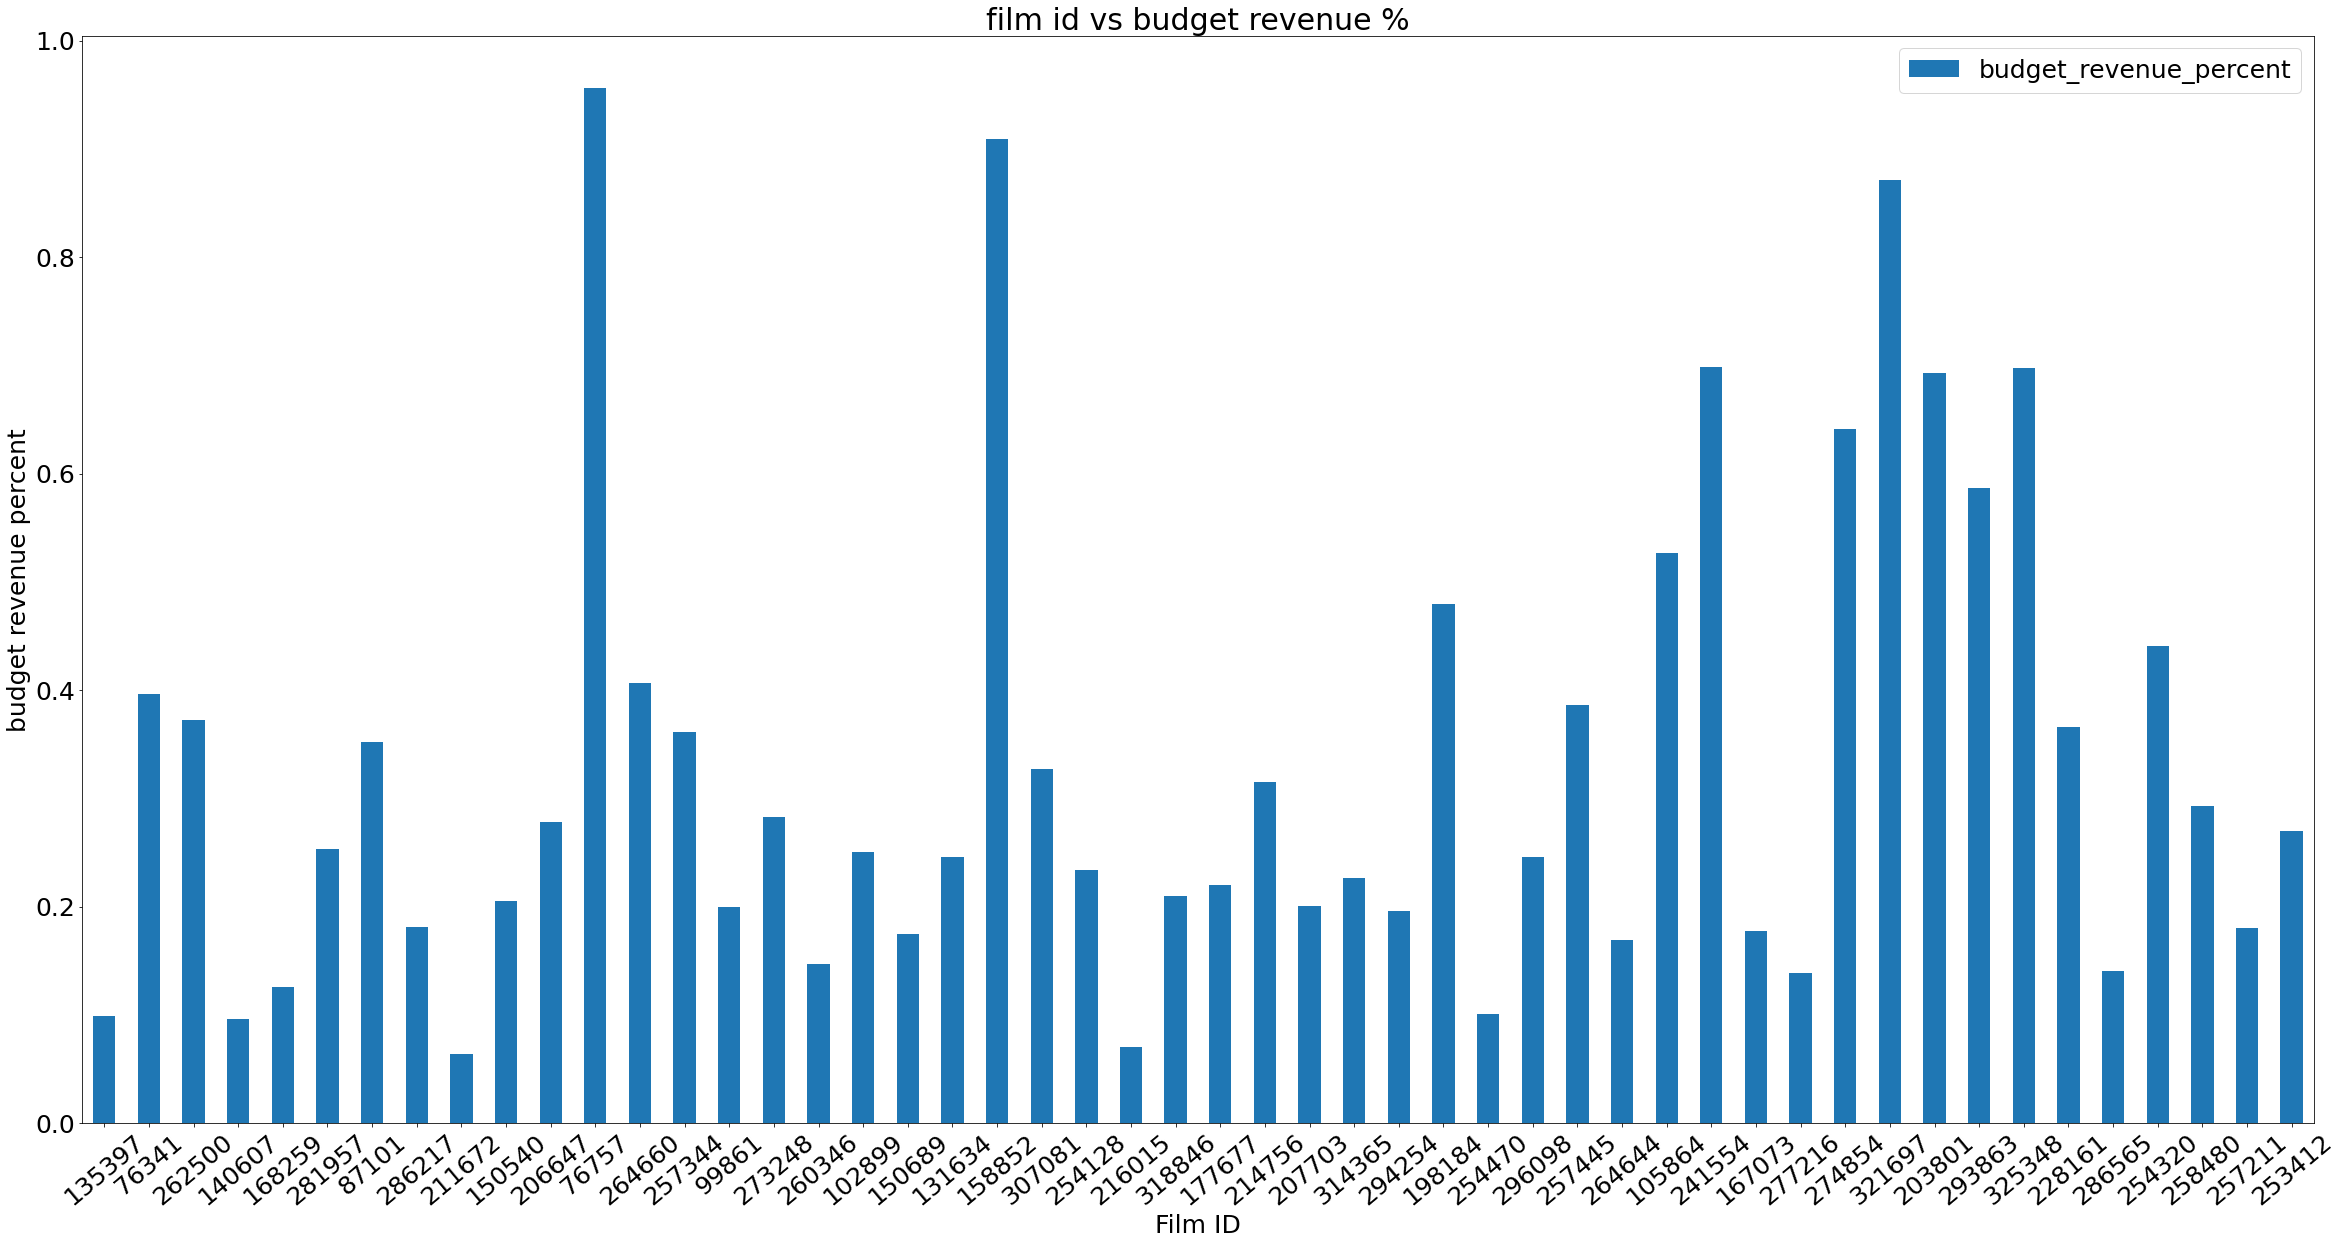

In [114]:
#films_2015_db_2.plot.line(x='id', y='budget_revenue_percent',figsize=(40,20))

fig2 = plt.figure()# Create matplotlib figure
ax1 = fig2.add_subplot(111) # Create matplotlib axes
width = 0.4
films_2015_db_2.plot.bar(x = 'id', y = ['budget_revenue_percent'], rot = 40, ax = ax1, figsize=(40,20))

plt.title("film id vs budget revenue %")
ax1.set_xlabel('Film ID')
ax1.set_ylabel('budget revenue percent')
plt.rcParams.update({'font.size': 25})



plt.show()

Finally we can say from the previous plot that more budget doesn't mean more revenue

### Q8 For the year 2015, what is the relation between the rating and popularity? Is a higher rate means a higher runtime?

In [115]:
# A subset of the data frame with only films released in 2015
films_2015_db_3 = tmdb_database_new[tmdb_database_new['release_year'] == 2015]

In [116]:
# subset of films_2015_db to draw
films_2015_db_sub_2 = films_2015_db_3[:50]

<AxesSubplot:ylabel='vote_average'>

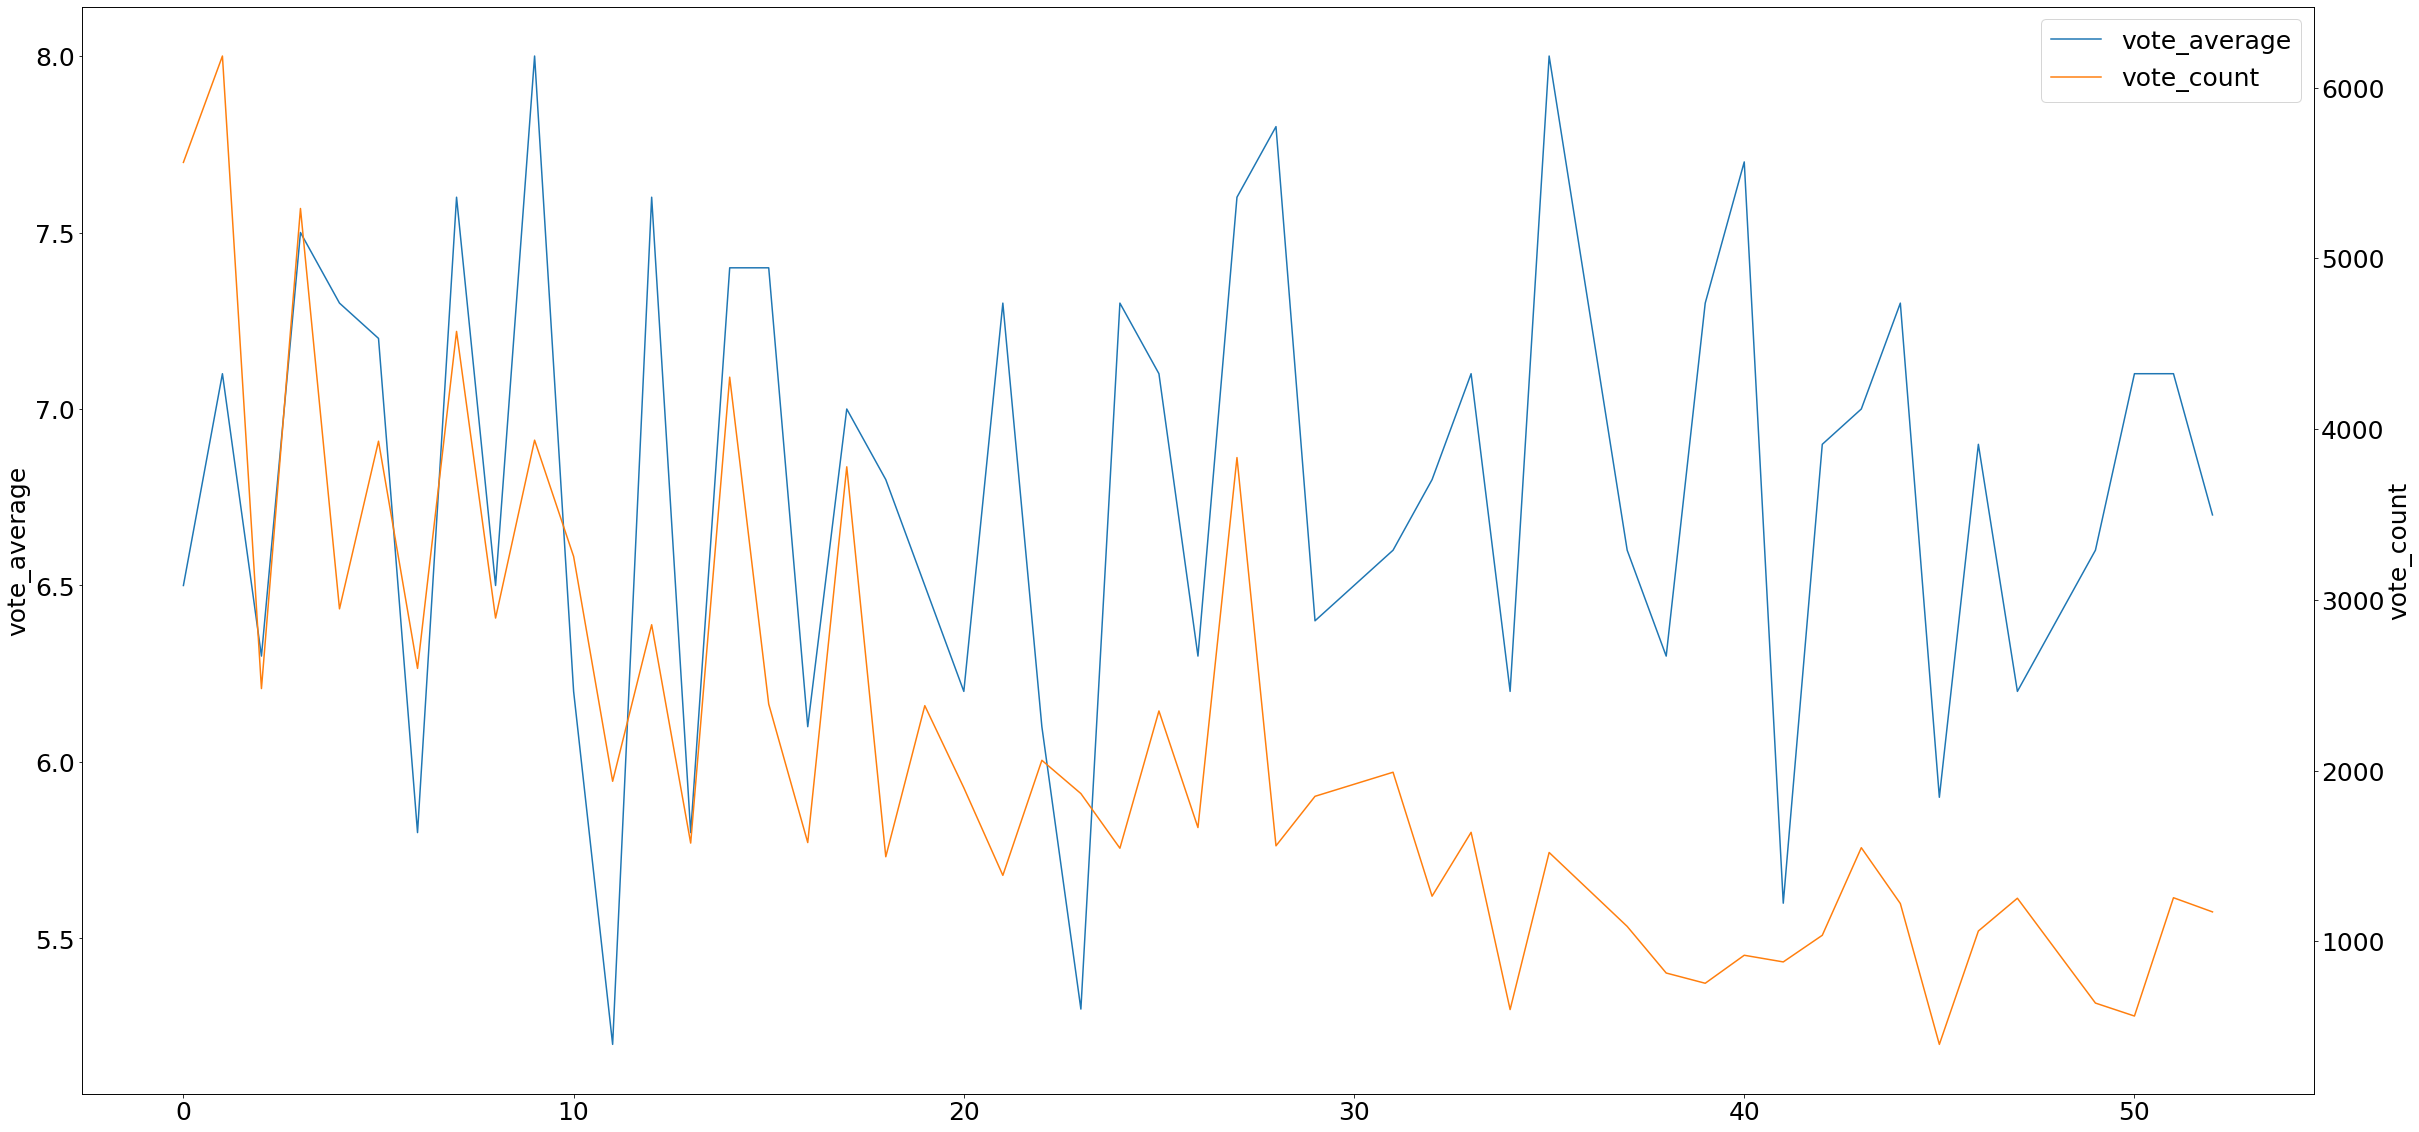

In [120]:
plot_multi(films_2015_db_sub_2, cols= ('vote_average', 'vote_count') ,figsize=(40, 20))

From the previous figure we found out that popular films are not necessary to have higher rates

<a id='conclusions'></a>
## Conclusions

Full conclusion:

1) Film (The Warrior's Way) released in 2010-12-02 has the highest budget in our dataframe with 425,000,000 Dollars

2) Film (Love, Wedding, Marriage) released in 2011-06-03 has the lowest budget in our dataframe with 0.97 Dollars

3) Film (Avatar) released in 2009-12-10 has the highest revenue in our dataframe with 2,827,123,750.41 Dollars

4) Film (Shattered Glass) released in 2003-11-14 has the lowest revenue in our dataframe with 02.37 Dollars

5) Film (The Shawshank Redemption) released in 1994-09-10 has the highest rate in our dataframe with average vote rate 8.4

6) Film (Foodfight!) released in 2012-06-15 has the lowest rate in our dataframe with average vote rate 2.2

7) Year 2011 has the largest number of released films with 199 films.

8) Year 1969 has the lowest number of released films with 4 films.

9) The year 2010 has the highest total films budget in our dataframe with 8,463,138,439.00 Dollars

10) The year 192 has the lowest total films budget in our dataframe with 123,398,694.38 Dollars

11) The year 2015 has the highest total films budget in our dataframe with 24,106,678,369.98 Dollars

12) The year 1966 has the lowest total films budget in our dataframe with 569,262,321.68 Dollars

13) more budget doesn't mean more revenue

14) popular films are not necessary to have higher rates
